In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [2]:
#Read NN and BMS data
n=9;runid=0;function='tanh' #tanh, leaky_ReLU
realization=2
sigma=0.06
NPAR=10 #10, 20
steps=50000

resolution='1x' #'0.5x', '1x', '2x', 'test'
test=False

#Read NN data
file_model='NN_no_overfit_' + function + '_sigma_' + str(sigma) + '_r_' + str(realization) + '.csv'
model_d='../data/' + resolution + '_resolution/trained_nns/' + file_model
d=pd.read_csv(model_d)
dn=d[d['rep']==n]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)
display(dn)

#Read BMS trace
if resolution=='1x':

    if sigma==0.1:
            filename='BMS_'+function+'_n_'+str(n)+'_sigma_0.10_r_' + str(realization) + '_trace_'+str(steps)+'_prior_'+str(NPAR)+ '.csv'
    else:
            filename='BMS_'+function+'_n_'+str(n)+'_sigma_'+str(sigma)+ '_r_' + str(realization) + '_trace_'+str(steps)+'_prior_'+str(NPAR)+ '.csv'

    if test==False:
        trace=pd.read_csv('../data/MSTraces/' + resolution + '_resolution/' + filename, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])
    elif test==True:
        trace=pd.read_csv('../data/MSTraces/' + 'test/' + filename, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])
    
elif resolution=='0.5x':
    if sigma==0.1:
            filename='BMS_'+function+'_n_'+str(n)+'_sigma_0.10_r_' + str(realization) + '_res_0.1_trace_'+str(steps)+'_prior_'+str(NPAR)+ '.csv'
    else:
            filename='BMS_'+function+'_n_'+str(n)+'_sigma_'+str(sigma)+ '_r_' + str(realization) + '_res_0.1_trace_'+str(steps)+'_prior_'+str(NPAR) + '.csv'

elif resolution=='2x':
    if sigma==0.1:
            filename='BMS_'+function+'_n_'+str(n)+'_sigma_0.1_r_' + str(realization) + '_res_0.025_trace_'+str(steps)+'_prior_'+str(NPAR)+ '.csv'
    else:
            filename='BMS_'+function+'_n_'+str(n)+'_sigma_'+str(sigma)+ '_r_' + str(realization) + '_res_0.025_trace_'+str(steps)+'_prior_'+str(NPAR) + '.csv'
    


,x1,y,rep,noise,y_noise,ymodel
0,-1.95,0.009303,9.0,-0.024799,-0.015496,0.006058
1,-1.90,0.010370,9.0,0.004070,0.014440,0.007817
2,-1.85,0.011538,9.0,-0.070153,-0.058615,0.009566
3,-1.80,0.012817,9.0,0.066134,0.078951,0.011309
4,-1.75,0.014218,9.0,-0.020629,-0.006412,0.013049
...,...,...,...,...,...,...
75,1.80,0.977272,9.0,-0.012779,0.964492,1.589423
76,1.85,0.981174,9.0,-0.063569,0.917605,1.609250
77,1.90,0.984438,9.0,0.013183,0.997622,1.627913
78,1.95,0.987156,9.0,0.025070,1.012226,1.645449


In [3]:
#Parameters to read models
VARS = ['x1',]
x = dn[[c for c in VARS]].copy()


if NPAR==10:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')
elif NPAR==20:
    prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np20.maxs200.2024-05-10 162907.551306.dat')

In [4]:
#Minimum description length model
y=dn.y_noise

minrow = trace[trace.H == min(trace.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)

t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(NPAR)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,
)

t.set_par_values(deepcopy(minparvals))

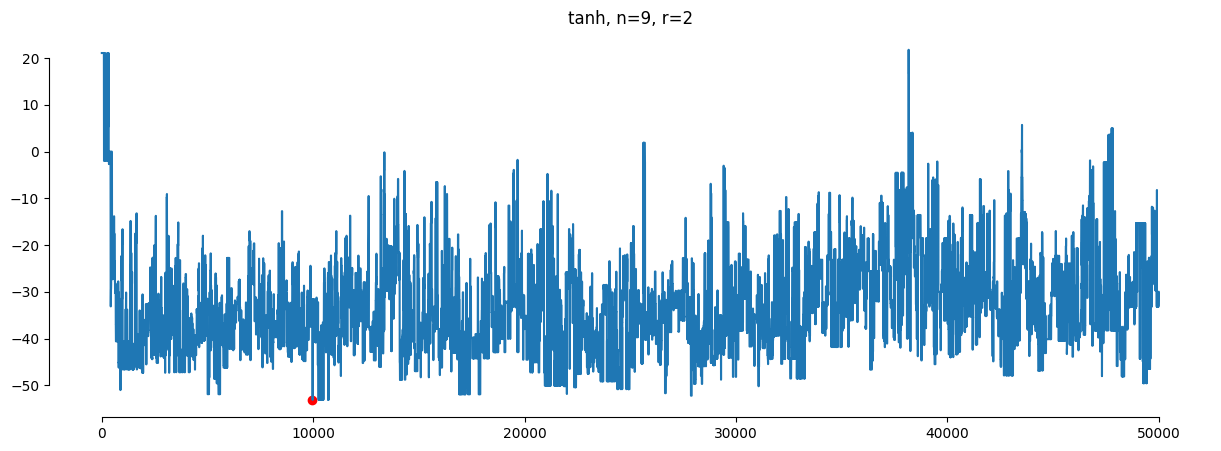

In [5]:
Nini = 00
plt.figure(figsize=(15, 5))

#Define figure size in cm                                                                           
Extensions=['.png']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                           
plt.title(str(function) + ', ' + 'n=' + str(n) +', r=' + str(realization))
plt.plot(trace.t[trace.t > Nini], trace.H[trace.t > Nini])
plt.scatter(minrow['t'], minH,color='r')
sns.despine(trim=True)

Name_figure='Energy_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)

for ext in Extensions:
        plt.savefig('../results/' + Name_figure + ext,dpi=300)

 
plt.show()

0.499999999999984
60
0.9999999999999822


,x1,y,rep,noise,y_noise,ymodel,ybms
59,1.00,0.855859,9.0,-0.063680,0.792179,1.126060,0.873276
60,1.05,0.862237,9.0,0.175898,1.038135,1.160117,0.882635
61,1.10,0.868817,9.0,0.015296,0.884112,1.194060,0.891345
62,1.15,0.875777,9.0,-0.007683,0.868094,1.227744,0.899447
63,1.20,0.883253,9.0,0.021232,0.904485,1.261023,0.906977
64,1.25,0.891313,9.0,0.097619,0.988932,1.293756,0.913970
65,1.30,0.899945,9.0,-0.012296,0.887649,1.325809,0.920460
66,1.35,0.909045,9.0,-0.035166,0.873880,1.357059,0.926481
67,1.40,0.918427,9.0,0.048071,0.966497,1.387396,0.932063
68,1.45,0.927841,9.0,-0.067292,0.860549,1.416727,0.937236


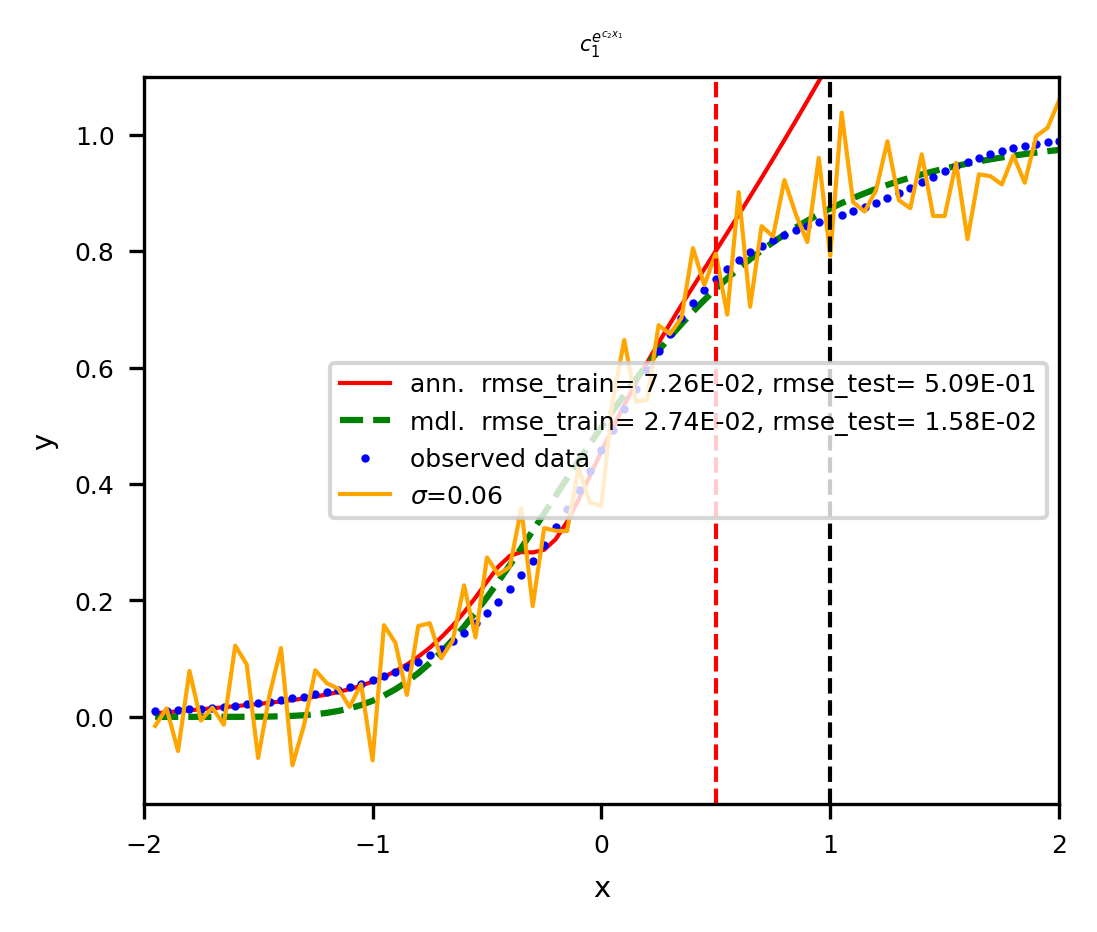

In [6]:
#Plot
if resolution=='0.5x':
    train_size_ann=25
    train_size=30
elif resolution=='1x':
    train_size_ann=50
    train_size=60
elif resolution=='2x':
    train_size_ann=100
    train_size=120


validation_border=dn.loc[train_size_ann-1]['x1']
print(validation_border)

train_border=dn.loc[train_size-1]['x1']
#wrong_train_border=dn.loc[30-1]['x1']
print(train_size)
print(train_border)

dplot = deepcopy(dn)
dplot['ybms'] = t.predict(x)


display(dplot.loc[train_size-1:])

rmse_nn_train=root_mean_squared_error(dplot.loc[:train_size-1]['ymodel'],dplot.loc[:train_size -1]['y'])
rmse_nn_test=root_mean_squared_error(dplot.loc[train_size-1:]['ymodel'],dplot.loc[train_size -1:]['y'])

#rmse_mdl=root_mean_squared_error(dplot.ybms,dn.y)
rmse_mdl_train=root_mean_squared_error(dplot.loc[:train_size-1]['ybms'],dn.loc[:train_size-1]['y'])
rmse_mdl_test =root_mean_squared_error(dplot.loc[train_size-1:]['ybms'],dn.loc[train_size-1:]['y'])

 
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 10*cm; height=8*cm

Extensions=['.png']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          


fig=figure(figsize=(width,height), dpi=300)                                                        

plt.plot(dn['x1'], dn['ymodel'],linewidth=line_w, color='red', label='ann.  rmse_train= %.2E, rmse_test= %.2E' % ( rmse_nn_train, rmse_nn_test)) 
plt.plot(dplot.x1, dplot.ybms, color='green', linestyle='--',label='mdl.  rmse_train= %.2E, rmse_test= %.2E' % ( rmse_mdl_train, rmse_mdl_test)) 
plt.plot(dn['x1'], dn['y'],'.', markersize=2, color='blue',label='observed data') 
plt.plot(dn['x1'], dn['y_noise'],linewidth=line_w, markersize=2, color='orange',label=r'$\sigma$=' + str(sigma) ) 
                                                                                

plt.axvline(x=validation_border,linestyle='--',linewidth=line_w, color='r')
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

#plt.axvline(x=wrong_train_border,linestyle='--',linewidth=line_w, color='b')

plt.title('$%s$' % t.latex(),fontsize=size_title)
#plt.title('n=%d, r=%d : $%s$' % (n, realization, t.latex()),fontsize=size_title)
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.legend(loc='best', fontsize=size_ticks)

#plt.xlim(-4.5,4.5);plt.ylim(-1.1,1.5) 
plt.xlim(-2,2);plt.ylim(-0.15,1.1)  

if test==False:
    Name_figure='Prediction_' + resolution + '_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)
elif test==True:
     Name_figure='Prediction_test' + resolution + '_' + function + '_n_' + str(n) + '_sigma_' + str(sigma) + '_r_'  + str(realization) + '_par_' + str(NPAR)

    
for ext in Extensions:
        plt.savefig('../results/' + Name_figure +ext,dpi=300)

plt.show()